# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
pip install --upgrade jupyter

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade ipywidgets


  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.3 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.0.7
    Uninstalling ipywidgets-8.0.7:
      Successfully uninstalled ipywidgets-8.0.7
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip show numpy  # Find installation direectory

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages
Requires: 
Required-by: bokeh, captum, contourpy, gym, hdijupyterutils, imageio, matplotlib, numba, onnx, opencv-python, pandas, patsy, pyarrow, sagemaker, sagemaker-pyspark, scikit-learn, scipy, seaborn, shap, smclarify, sparkmagic, statsmodels, torchtext, torchvision


In [8]:
# updata the path to include user installation directory
import os
new_path = '/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages'
os.environ['PATH'] = f"{os.environ['PATH']}:{new_path}"

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [9]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image
])

# Create training set and define training dataloader
## YOUR CODE HERE ##

training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

- I have applied two transformation, ToTensor()and Normalization to the orginal dataset because of the following reasons:

   - ToTensor() will help us to convert PIL (Python Image Library) format to PyTorch tensor format, this will allow us to easily manipulate the images as tensors and feed them into a neural network for the next training or inference phase.
   - The normalization can help us to normalize the data with the mean and standard deviation of the MNIST dataset, this can help us training neural networks more effectively and efficiently.
   
- Splitting the data: Split the dataset into training and testing sets. The training set is used to train the machine learning model, while the testing set is used to evaluate the performance of the model.


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [10]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


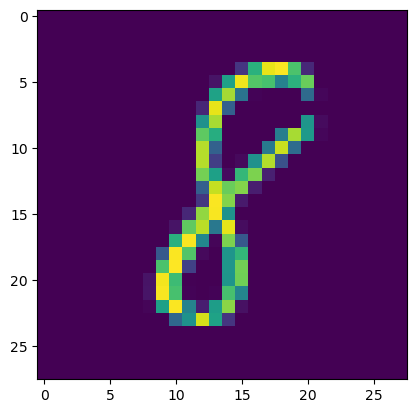

9


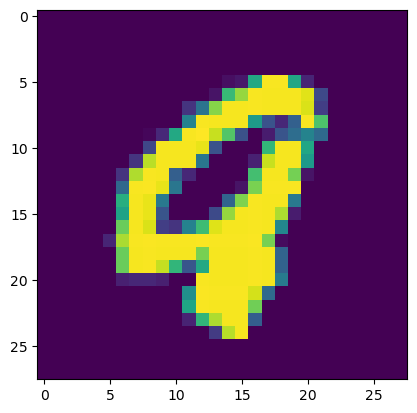

4


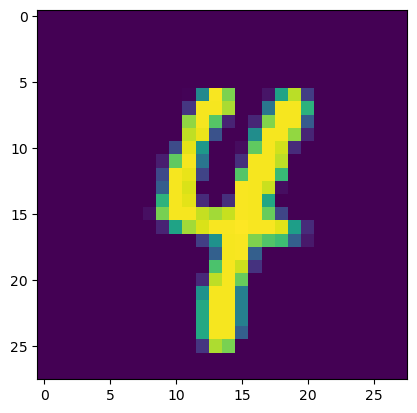

3


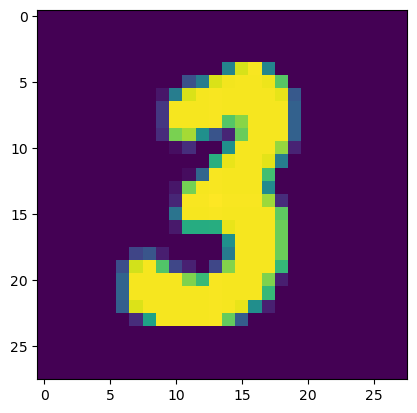

2


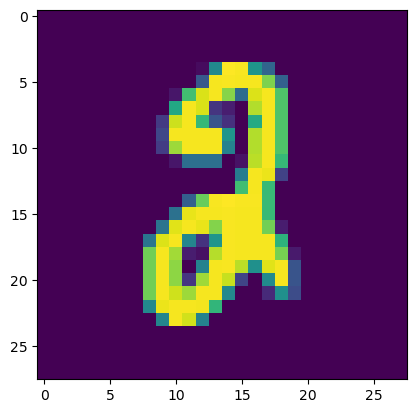

In [11]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

Image Shape:  torch.Size([64, 1, 28, 28])
Label Shape:  torch.Size([64])


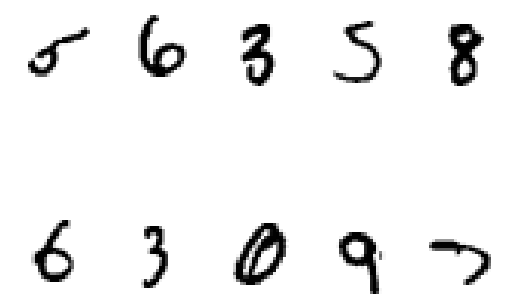

In [12]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print('Image Shape: ', images.shape)
print('Label Shape: ',labels.shape)

figure = plt.figure()
num_of_images = 10
for index in range(1, (num_of_images + 1)):
    plt.subplot(2, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
## YOUR CODE HERE ##
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Create an instance of the neural network
model = NeuralNetwork()
print(model)
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [27]:
n_epochs = 10
model.train()
loss_values = []
accuracy_values = []
for epoch in range(n_epochs):
    run_loss = 0
    run_corrects = 0
    
    for batch_i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
        run_corrects += torch.sum(preds == labels.data)
        
        # Print loss and accuracy for every 250 batchs 
        if batch_i % 250 == 249:
            batch_loss = run_loss /250
            batch_accuracy = run_corrects / (250 * train_loader.batch_size)
            print(f"Epoch: {epoch +1 } / {n_epochs}, Batch: {batch_i +1}/{len(train_loader)},Loss:{batch_loss:.5f}, Accuracy:{batch_accuracy:.5f}")
            loss_values.append(batch_loss)
            accuracy_values.append(batch_accuracy)
            run_loss = 0
            run_corrects = 0

Epoch: 1 / 10, Batch: 250/938,Loss:1.48981, Accuracy:0.97225
Epoch: 1 / 10, Batch: 500/938,Loss:1.48935, Accuracy:0.97275
Epoch: 1 / 10, Batch: 750/938,Loss:1.49080, Accuracy:0.97056
Epoch: 2 / 10, Batch: 250/938,Loss:1.48789, Accuracy:0.97369
Epoch: 2 / 10, Batch: 500/938,Loss:1.48831, Accuracy:0.97287
Epoch: 2 / 10, Batch: 750/938,Loss:1.48997, Accuracy:0.97162
Epoch: 3 / 10, Batch: 250/938,Loss:1.48718, Accuracy:0.97444
Epoch: 3 / 10, Batch: 500/938,Loss:1.48560, Accuracy:0.97606
Epoch: 3 / 10, Batch: 750/938,Loss:1.48971, Accuracy:0.97219
Epoch: 4 / 10, Batch: 250/938,Loss:1.48516, Accuracy:0.97669
Epoch: 4 / 10, Batch: 500/938,Loss:1.48586, Accuracy:0.97613
Epoch: 4 / 10, Batch: 750/938,Loss:1.48770, Accuracy:0.97419
Epoch: 5 / 10, Batch: 250/938,Loss:1.48789, Accuracy:0.97325
Epoch: 5 / 10, Batch: 500/938,Loss:1.48504, Accuracy:0.97675
Epoch: 5 / 10, Batch: 750/938,Loss:1.48791, Accuracy:0.97350
Epoch: 6 / 10, Batch: 250/938,Loss:1.48403, Accuracy:0.97769
Epoch: 6 / 10, Batch: 50

Plot the training loss (and validation loss/accuracy, if recorded).

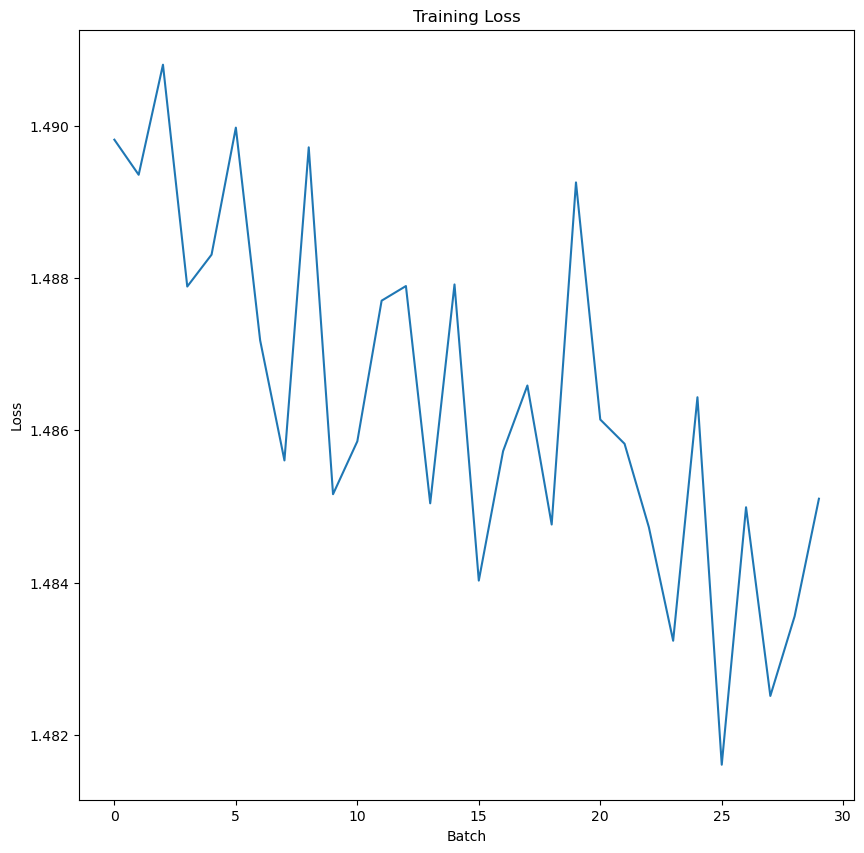

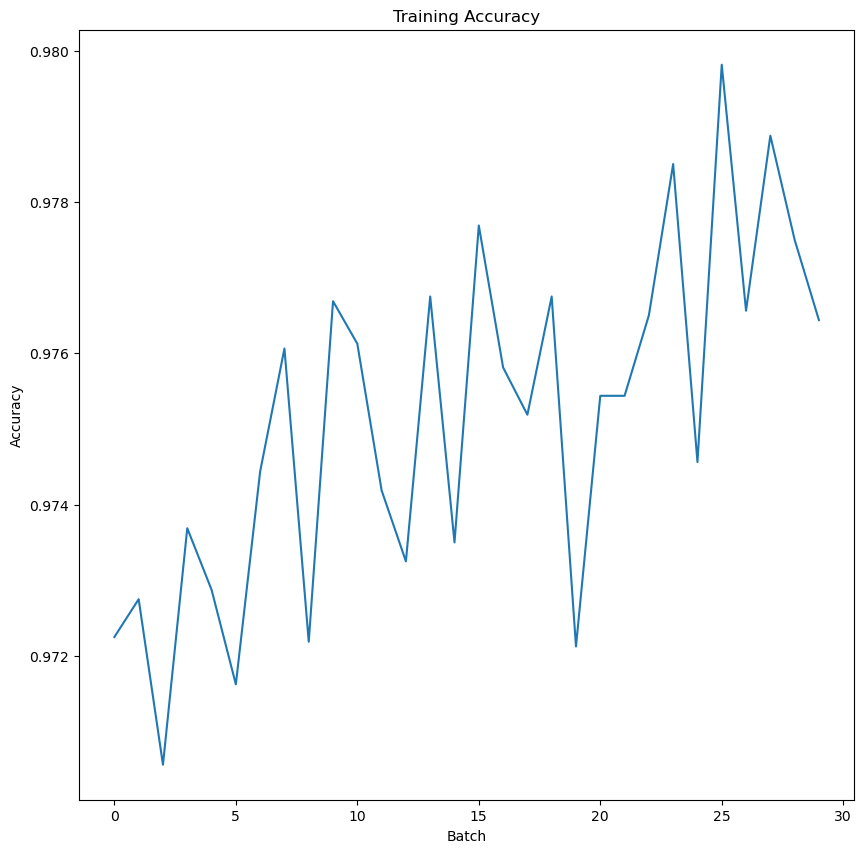

In [28]:
## YOUR CODE HERE ##
#Plot the loss and accuracy

plt.figure(figsize=(10,10))
plt.plot(loss_values)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.figure(figsize=(10,10))
plt.plot(accuracy_values)
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [30]:
## YOUR CODE HERE ##
# Testing model accuracy 
model.eval()
test_corrects = 0
total_samples = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    test_corrects += torch.sum(preds == labels.data)
    total_samples += len(labels)
    
test_accuracy = test_corrects / total_samples
print(f"Test Accuracy:{test_accuracy:.5f}")


Test Accuracy:0.97280


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [31]:
## YOUR CODE HERE ##
# Changing two hyperparameters, dropout value and epoch can increase the accuracy 
## YOUR CODE HERE ##
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.1)
        self.activation = F.relu
    #Define the feed forward neural network architecture 
    def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.softmax(x, dim = 1)
        return x


# create instance of the new neural network model
model = NeuralNetwork().to(device)

## YOUR CODE HERE ##
# Before training the model first we should define loss function and optmizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)


## YOUR CODE HERE ##
# Training the model
n_epochs = 20
model.train()
loss_values = []
accuracy_values = []
for epoch in range(n_epochs):
    run_loss = 0
    run_corrects = 0
    
    for batch_i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
        run_corrects += torch.sum(preds == labels.data)
        
        # Print loss and accuracy for every 250 batchs 
        if batch_i % 250 == 249:
            batch_loss = run_loss /250
            batch_accuracy = run_corrects / (250 * train_loader.batch_size)
            print(f"Epoch: {epoch +1 } / {n_epochs}, Batch: {batch_i +1}/{len(train_loader)},Loss:{batch_loss:.5f}, Accuracy:{batch_accuracy:.5f}")
            loss_values.append(batch_loss)
            accuracy_values.append(batch_accuracy)
            run_loss = 0
            run_corrects = 0
            
# Testing model accuracy 
model.eval()
test_corrects = 0
total_samples = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    test_corrects += torch.sum(preds == labels.data)
    total_samples += len(labels)
    
test_accuracy = test_corrects / total_samples
print(f"Test Accuracy:{test_accuracy:.5f}")

Epoch: 1 / 20, Batch: 250/938,Loss:1.71464, Accuracy:0.78075
Epoch: 1 / 20, Batch: 500/938,Loss:1.58256, Accuracy:0.89106
Epoch: 1 / 20, Batch: 750/938,Loss:1.56657, Accuracy:0.90263
Epoch: 2 / 20, Batch: 250/938,Loss:1.54586, Accuracy:0.92069
Epoch: 2 / 20, Batch: 500/938,Loss:1.54372, Accuracy:0.92212
Epoch: 2 / 20, Batch: 750/938,Loss:1.53441, Accuracy:0.93163
Epoch: 3 / 20, Batch: 250/938,Loss:1.52853, Accuracy:0.93713
Epoch: 3 / 20, Batch: 500/938,Loss:1.52068, Accuracy:0.94488
Epoch: 3 / 20, Batch: 750/938,Loss:1.52090, Accuracy:0.94256
Epoch: 4 / 20, Batch: 250/938,Loss:1.51355, Accuracy:0.94969
Epoch: 4 / 20, Batch: 500/938,Loss:1.51418, Accuracy:0.94987
Epoch: 4 / 20, Batch: 750/938,Loss:1.51201, Accuracy:0.95169
Epoch: 5 / 20, Batch: 250/938,Loss:1.50740, Accuracy:0.95606
Epoch: 5 / 20, Batch: 500/938,Loss:1.50761, Accuracy:0.95506
Epoch: 5 / 20, Batch: 750/938,Loss:1.50799, Accuracy:0.95569
Epoch: 6 / 20, Batch: 250/938,Loss:1.50541, Accuracy:0.95669
Epoch: 6 / 20, Batch: 50

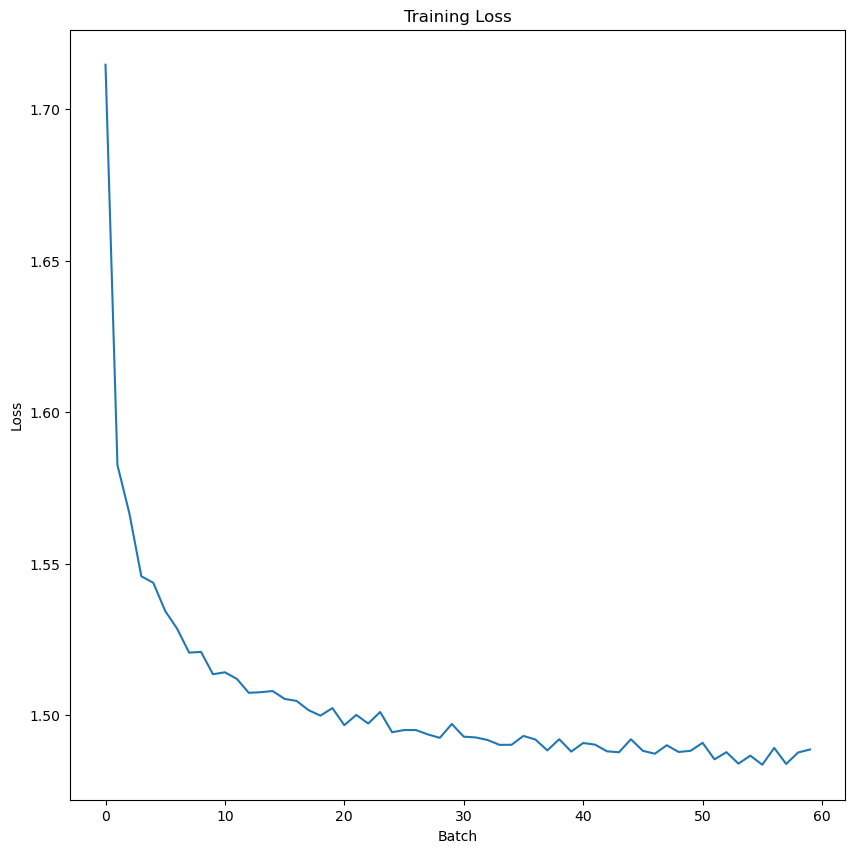

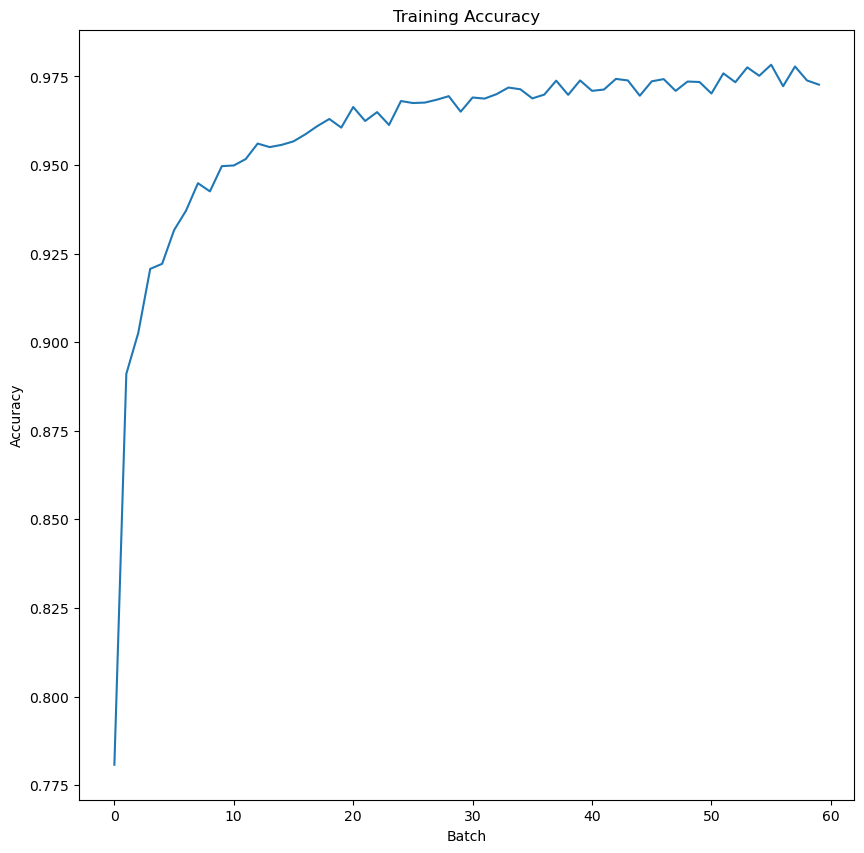

In [34]:
#Plot the loss and accuracy

plt.figure(figsize=(10,10))
plt.plot(loss_values)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.figure(figsize=(10,10))
plt.plot(accuracy_values)
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [35]:
## YOUR CODE HERE ##
torch.save(model,'final_model')